In [72]:
import pretty_errors
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from datetime import datetime
from scipy import stats
from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  # 默认为'last'
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.style.use("ggplot")
%matplotlib inline

<div class="jumbotron">
    <h1 class="display-1">数据分析</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

> **数据分析的层次**
<center><img src="./img/analysis/analysisHierachy.svg" width=100%></center>

## 数据描述性分析

### 数据基本描述

<center><img src="./img/analysis/chipotle.jpg" width=60%></center>

#### 将数据集存入一个名为chipo的数据框内

In [6]:
chipo = pd.read_csv('./data/analysis/chipotle.csv')

#### 查看前10行内容

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 数据集中有多少个列(columns)

In [5]:
chipo.shape[1]

5

#### 显示全部列名

In [6]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### 显示数据集的索引

In [7]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### 顾客最爱点哪个商品（item)？

In [57]:
ordered = chipo.groupby(by='item_name').agg({'quantity': 'sum'})
ordered.head()
# sorted(ordered['quantity'])
ordered.sort_values(by='quantity', ascending=False)

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


##### DataFrame对值排序
```python
DataFrame.sort_values(by, axis=0, ascending=True, inplace=False)
```
- `by`：`str`或者`list of str`

#### 顾客总共买了多少种商品（item)？

In [9]:
ordered.shape[0]

50

#### 下单总量是多少？

In [10]:
ordered['quantity'].sum()

4972

#### 将item_price转换为浮点数(float)

In [11]:
chipo.head()
chipo['item_price'] = chipo['item_price'].map(lambda x: float(x[1:]))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 在该数据集对应的时期内，该chipotle门店的收入是多少?

##### 新增一列`sub_total`计算每个order的收入

In [12]:
chipo['sub_total'] = chipo['item_price']*chipo['quantity']
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,sub_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


##### 计算所有`sub_total`的总和

In [13]:
chipo['sub_total'].sum()

39237.02

#### 该chipotle门店一共有多少订单？

```python
Series.unique()
```
- 返回`Series`中的独特元素构成的数组

```python
Series.nunique(dropna=True)
```
- 计算`Series`中独特元素的个数，默认不计算空值

In [14]:
chipo['order_id'].nunique()

1834

#### 每一单(order)对应的平均总价是多少？

In [15]:
chipo.groupby(by='order_id').agg({'sub_total': 'sum'}).mean()

sub_total    21.394231
dtype: float64

### 数据可视化展示

<center><img src="./img/analysis/titanic.jpg" width=60%></center>

#### 读入数据

In [6]:
titanicDf = pd.read_csv('./data/analysis/train.csv')
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


列名|含义
---|---
PassengerId|乘客ID
Survived|遇难0，生存1
Pclass|船票等级
SibSp|同在船上的兄弟姐妹和配偶人数
Parch|同在船上的父母和子女人数
Ticket|船票号码
Fare|船票价格
Cabin|船舱号码
Embarked|登船港口

#### 识别每个属性的类型

In [21]:
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


属性|类型
---|---
PassengerId|序列
Survived|标称
Pclass|序列
Name|标称
Sex|标称
Age|比率
SibSp|比率
Parch|比率
Ticket|标称
Fare|比率
Cabin|标称
Embarked|标称

#### 有无重复信息？共有多少乘客？

In [23]:
titanicDf.duplicated().unique()
titanicDf.shape[0]

array([False])

891

#### 将PassengerId设为索引

In [24]:
titanicDf.set_index('PassengerId', inplace=True)
titanicDf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### `DataFrame`建立索引
```python
DataFrame.set_index(keys, drop=True, inplace=False)
```
- 用1个或多个列，或者名称列表给`DataFrame`设置索引（行名）
- `keys`：可以是单个列列名、由名称构成的列表、`Series`（长度与`DataFrame`的行数一样），或者是前述形式的各种组合
- `drop`：是否将设置为索引的列从`DataFrame`中删除，默认删除

In [6]:
idxDf = pd.DataFrame({'month': [1, 4, 7, 10],
                      'year': [2012, 2014, 2013, 2014],
                      'sale': [55, 40, 84, 31]})
idxDf

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


In [7]:
idxDf.set_index('month')

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [8]:
idxDf.set_index(['year', 'month'])

,,sale
year,month,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


In [9]:
idxDf.set_index([[1, 2, 3, 4], 'year'])

,,month,sale
,year,,
1,2012,1,55
2,2014,4,40
3,2013,7,84
4,2014,10,31


#### 用饼图展示船票等级及比例

- 有多少个船票等级？分别是什么？每个等级多少乘客？

In [25]:
titanicDf['Pclass'].nunique()    # 计算不重复元素的个数
titanicDf['Pclass'].unique()
classSe = titanicDf['Pclass'].value_counts()
classSe

3

array([3, 1, 2])

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### 更改索引名称
```python
    Series.rename(index=None, inplace=False)
```
- 更改`Series`的索引名称
- `index`：可以是字典、函数

In [11]:
s = pd.Series([100, 200, 300])
s
s.rename({0: 'one', 2: 'three'})
s.rename(lambda x: x**2)

0    100
1    200
2    300
dtype: int64

one      100
1        200
three    300
dtype: int64

0    100
1    200
4    300
dtype: int64

In [26]:
classSe
classSe.rename({3: '普通', 1: '高级', 2: '中级'}, inplace=True)
classSe

3    491
1    216
2    184
Name: Pclass, dtype: int64

普通    491
高级    216
中级    184
Name: Pclass, dtype: int64

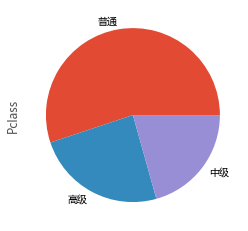

In [13]:
classSe.plot(kind='pie')

#### `pandas`绘图
```python
Series.plot(*args)
DataFrame.plot(x,y,*args)
```
- `kind`：绘图样式类型
    + `line`：线条图
    + `bar`：纵向柱状图
    + `barh`：横向柱状图
    + `hist`：直方图
    + `pie`：饼图
    + `scatter`：散点图
- `figsize`：`(宽,高)`构成的元组，单位英寸
- `title`：`str`，图标题
- `rot`：整数，表示`x`轴和`y`轴刻度的旋转角度
- 针对`DataFrame`，`x`和`y`分别是放在`x`轴的列名和`y`轴的列名

```python
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
```
- 图形能够显示中文字体

```python
plt.style.use('ggplot')
```
- 可选样式

In [14]:
IFrame('https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html',
       width=800, height=600)

#### 针对饼图的特有参数
- `explode`：列表，设置每个饼图的楔形体离开中心的距离，该列表的长度与数据的个数一致
- `autopct`：字符串类型或者是函数，显示每个楔形体对应的百分比

<AxesSubplot:ylabel='Pclass'>

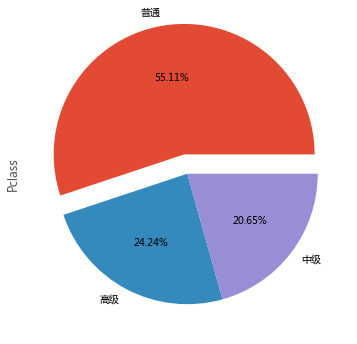

In [36]:
classSe.plot(kind='pie', explode=[0.15, 0, 0],
             autopct='%.2f%%', figsize=(12, 6))

#### 用柱状图展示在各个港口上船的乘客数量

<AxesSubplot:>

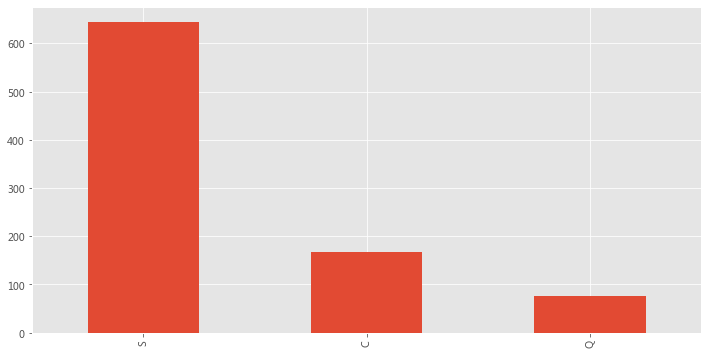

In [38]:
portSe = titanicDf['Embarked'].value_counts()
portSe.plot(kind='bar', figsize=(12, 6))

#### 针对柱状图的特有参数
- `color`：单个值或者列表。如果是单个值，改变所有柱形的颜色，如果是列表，为每个柱形配一个颜色
- `edgecolor`：柱形边框颜色。单个值或者列表
- `stacked`：`True`多列叠放，`False`多列平放

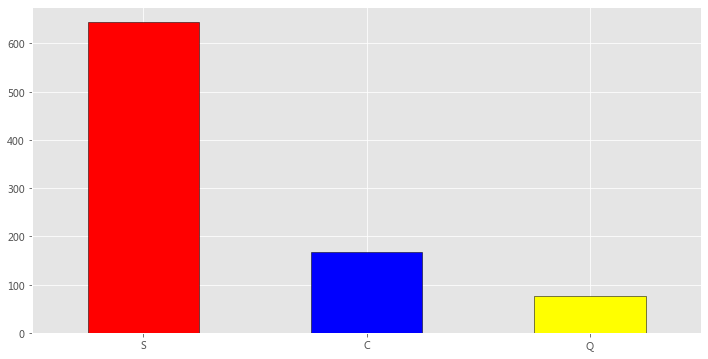

In [17]:
portSe.plot(kind='bar', color=['red', 'blue', 'yellow'], figsize=(
    12, 6), edgecolor='black', rot=0)

##### 生还与未生还人员在登船港口有无差异

In [50]:
# 生成列联表
crosstab = pd.crosstab(titanicDf['Embarked'], titanicDf['Survived'])
crosstab

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


<AxesSubplot:xlabel='Embarked'>

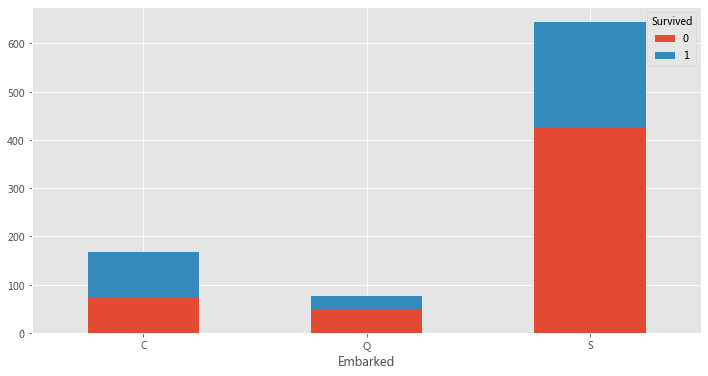

In [58]:
crosstab.plot(kind='bar', figsize=(12, 6), rot=0, stacked=True)

##### 绘制横向柱状图
```python
DataFrame.plot(kind='barh')
```

<AxesSubplot:>

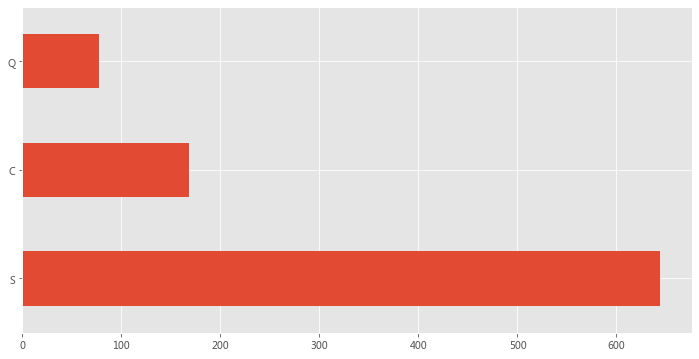

In [39]:
portSe.plot(kind='barh', figsize=(12, 6))

#### 绘制一个展示船票Fare与乘客年龄和生还与否的散点图

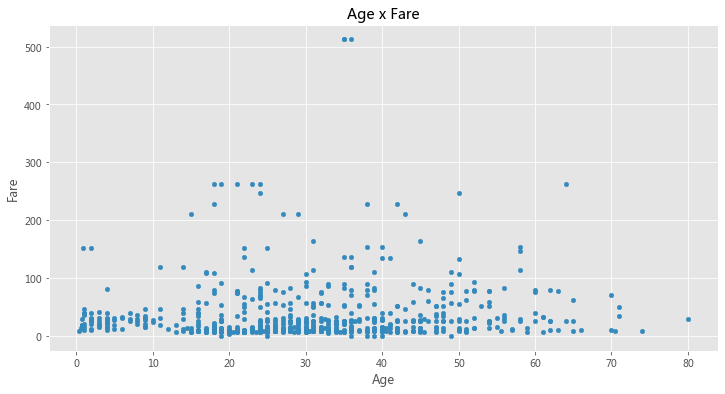

In [18]:
titanicDf.plot(x='Age', y='Fare', kind='scatter',
               title='Age x Fare', figsize=(12, 6))

#### 针对散点图的特有参数
- `s`：点的大小。单个数值或列表。如果是单个数值，所有点被设置成同样大，如果是列表，点的大小按照列表的顺序变化
- `c`：点的颜色。单个数值或列表。如果是单个数值，所有点被设置成同样颜色，如果是列表，点的颜色按照列表的顺序变化

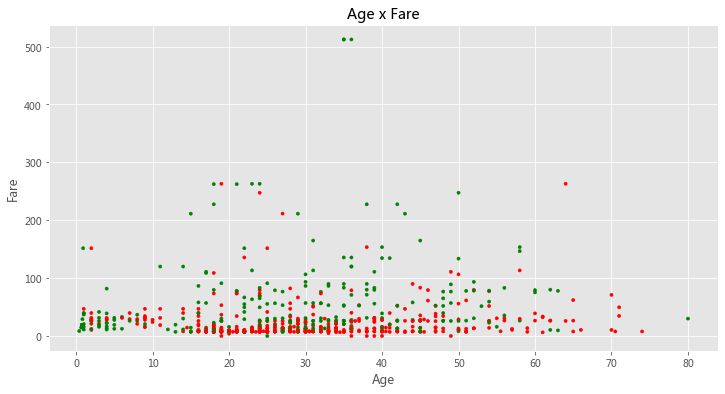

In [19]:
titanicDf.plot(x='Age', y='Fare', kind='scatter', title='Age x Fare', figsize=(
    12, 6), s=10, c=['red' if x == 0 else 'green' for x in titanicDf['Survived']])

#### 绘制展示船票价格的直方图

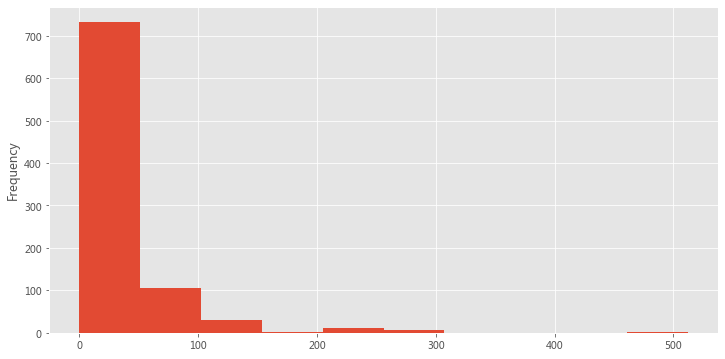

In [20]:
titanicDf['Fare'].plot(kind='hist', figsize=(12, 6))

#### 针对直方图特有的参数
- `bins`：整数，划分成的面元（bin）的数量，默认为10
- `alpha`：透明度，默认值为1；增加透明度，减小alpha

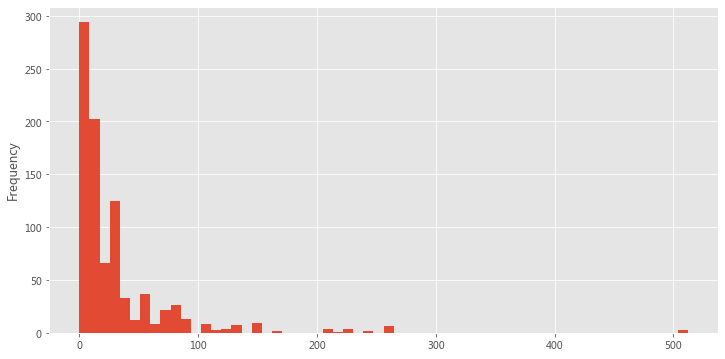

In [21]:
titanicDf['Fare'].plot(kind='hist', bins=60, figsize=(12, 6))

#### 同时绘制多列数据

<AxesSubplot:ylabel='Frequency'>

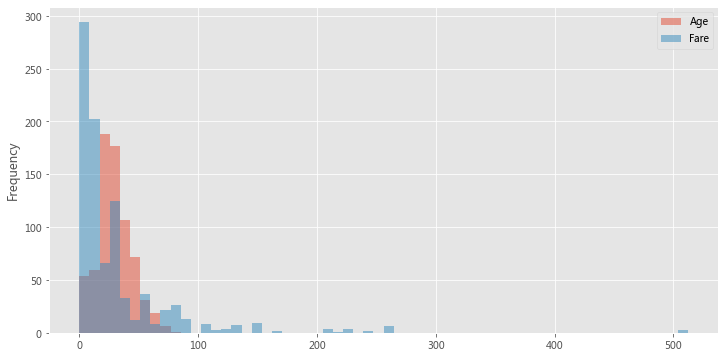

In [59]:
titanicDf.plot(y=['Age', 'Fare'], kind='hist',
               bins=60, figsize=(12, 6), alpha=0.5)

- `subplots`：`True`用子图形式展示多列数据；默认是`False`

- `layout`：子图的排列形式。由2个整数构成的元组，分别表示有几行和几列。例如，(1,2)表示1行2列

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

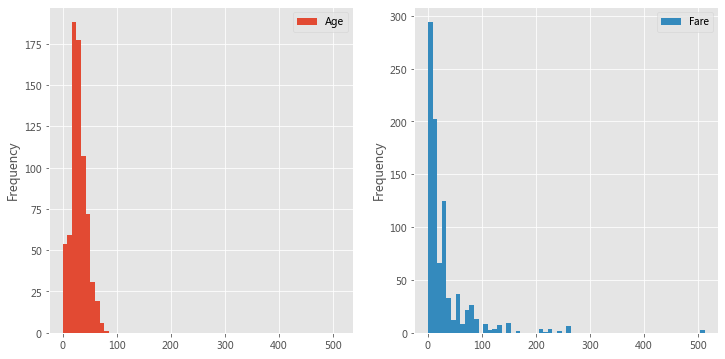

In [78]:
titanicDf.plot(y=['Age', 'Fare'], kind='hist', bins=60,
               figsize=(12, 6), subplots=True, layout=(1, 2))

array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>]], dtype=object)

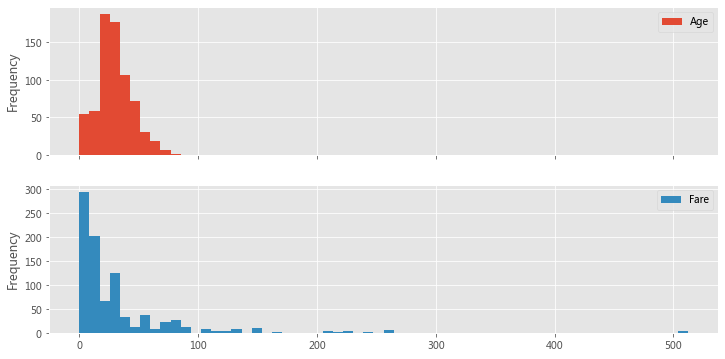

In [80]:
titanicDf.plot(y=['Age', 'Fare'], kind='hist', bins=60,
               figsize=(12, 6), subplots=True, layout=(2, 1))

### 探索时间序列数据

<center><img src="./img/analysis/R-C.jpg" width=50%></center>

#### 读取数据

In [104]:
appleDf = pd.read_csv('./data/analysis/000001.csv')
appleDf.head()

,date,open,high,low,close,volume
0,2022-03-29,3216.012,3229.177,3196.455,3203.939,31627364900
1,2022-03-28,3185.167,3230.215,3159.835,3214.503,34499487300
2,2022-03-25,3247.157,3257.106,3211.645,3212.240,34002000600
3,2022-03-24,3256.057,3266.887,3236.659,3250.264,32900665400
4,2022-03-23,3264.792,3279.887,3251.982,3271.033,34987537000


#### 查看每列数据类型

In [105]:
appleDf.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

#### 将`Date`列转换为`datetime`类型

In [106]:
appleDf['date'] = pd.to_datetime(appleDf['date'])
appleDf.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

```python
pandas.to_datetime(arg)
```
- `arg`：需要被转换成时间类型的原数据
- 返回的是一个`datetime`数据类型

In [2]:
pd.to_datetime('today')

Timestamp('2023-03-01 11:34:12.814891')

In [95]:
pd.to_datetime('today')

Timestamp('2021-03-30 11:23:30.141771')

In [ ]:
pd.to_datetime('2019 12 24 15:15:50')
pd.to_datetime('2019-12-24 15:15:50')
pd.to_datetime('2019/12/24 15:15:50')
pd.to_datetime('12/6/2019 15:15:50')
pd.to_datetime('2019-12-24')
pd.to_datetime('2019-12')
pd.to_datetime('2019')

#### 同时操作`Series`的时间数据

```python
    Series.dt
```
- 获取`Series`的时间对象
- 属性：
    - `second`、`minute`、`hour`、`day`、`month`、`year`，获取对应的秒、分钟、小时、月、年
    - `weekday`或者`dayofweek`，获取对应的星期几，周一是0，周日是6

In [107]:
appleDf['date'].dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
7637    1990
7638    1990
7639    1990
7640    1990
7641    1990
Name: date, Length: 7642, dtype: int64

#### 将`Date`设置为索引

In [108]:
appleDf.set_index('date', inplace=True)
appleDf.head()

,open,high,low,close,volume
date,,,,,
2022-03-29,3216.012,3229.177,3196.455,3203.939,31627364900
2022-03-28,3185.167,3230.215,3159.835,3214.503,34499487300
2022-03-25,3247.157,3257.106,3211.645,3212.240,34002000600
2022-03-24,3256.057,3266.887,3236.659,3250.264,32900665400
2022-03-23,3264.792,3279.887,3251.982,3271.033,34987537000


#### 将`index`设置为升序

In [109]:
appleDf.sort_index(ascending=True, inplace=True)
appleDf.head()

,open,high,low,close,volume
date,,,,,
1990-12-19,96.05,99.98,95.79,99.98,126000
1990-12-20,104.30,104.39,99.98,104.39,19700
1990-12-21,109.07,109.13,103.73,109.13,2800
1990-12-24,113.57,114.55,109.13,114.55,3200
1990-12-25,120.09,120.25,114.55,120.25,1500


#### 找到每个月的最后一个交易日

In [214]:
monthLastDay = appleDf.resample('BM')
monthLastDay
# for each in monthLastDay:
#     print(each)
monthLastDay.last()

,open,high,low,close,volume,smoothClose,diff
date,,,,,,,
1990-12-31,126.560,127.610,126.480,127.610,7800,NaN,1.160
1991-01-31,129.930,130.460,129.930,129.970,51000,NaN,-0.470
1991-02-28,132.990,133.520,132.980,133.010,225800,NaN,-0.460
1991-03-29,120.160,120.610,120.110,120.190,218500,NaN,-0.420
1991-04-30,113.890,114.870,113.890,113.940,485000,NaN,-0.810
...,...,...,...,...,...,...,...
2021-11-30,3570.747,3582.115,3546.362,3563.887,34918793800,3478.435947,1.190
2021-12-31,3626.242,3642.843,3624.942,3639.775,32968193200,3504.742727,20.586
2022-01-31,3407.593,3417.045,3356.556,3361.440,29085525700,3519.831863,-32.807


#### `resample`函数
```python
DataFrame.resample(rule, axis=0)
```
- `rule`：字符串表示的采样频率
    + `D`：自然天
    + `T/min`：分钟
    + `S`：秒
    + `B`：工作日
    + `M`：月底
    + `BM`：工作月底

#### 数据集中最早的日期和最晚的日期相差多少天？

In [111]:
diff = appleDf.index.max()-appleDf.index.min()
diff

Timedelta('11423 days 00:00:00')

#### 时间差的使用

- `Timedelta`：`pandas`的时间差对象
    + `Timedelta.days`：时间差内包含的天数
    + `Timedelta.total_seconds()`：时间差内包含的总秒数

In [215]:
diff.days
diff.total_seconds()

11423

986947200.0

- 生成时间差对象
```python
pd.to_timedelta(arg)
```
    + `arg`：需要转换成`Timedelta`类型的数据
    + 返回的是`Timedelta`对象

In [3]:
pd.to_timedelta('1 days')
pd.to_timedelta('1 days 06:05:01')
pd.to_datetime('today')+pd.to_timedelta('1 days')

Timedelta('1 days 00:00:00')

Timedelta('1 days 06:05:01')

Timestamp('2023-03-02 11:40:15.326366')

#### 在数据中一共有多少个月？

In [217]:
monthLastDay.first().shape[0]

376

#### 按照时间顺序可视化`close`值

<AxesSubplot:xlabel='date'>

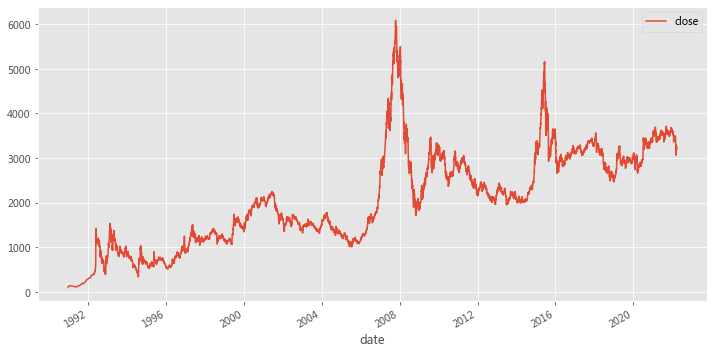

In [117]:
appleDf.plot(y='close', kind='line', figsize=(12, 6))

#### 调整横纵坐标轴名称

matplotlib.axes._subplots.AxesSubplot

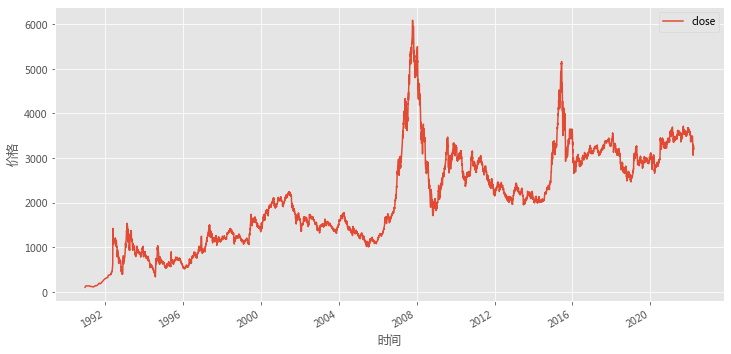

In [218]:
ax = appleDf.plot(y='close', kind='line', figsize=(12, 6))
type(ax)
_ = ax.set(xlabel='时间', ylabel='价格')

##### 调整子图横纵坐标轴名称

[Text(0.5, 0, '时间'), Text(0, 0.5, '收盘价')]

[Text(0.5, 0, '时间'), Text(0, 0.5, '成交量')]

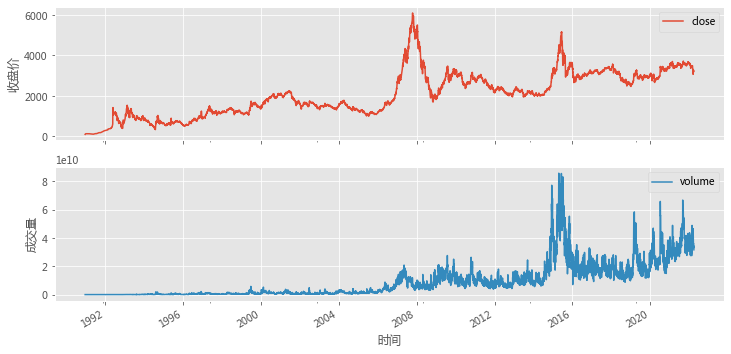

In [119]:
ax1 = appleDf.plot(y=['close', 'volume'], kind='line',
                   figsize=(12, 6), subplots=True, layout=(2, 1))
ax1[0][0].set(xlabel='时间', ylabel='收盘价')
ax1[1][0].set(xlabel='时间', ylabel='成交量')

[Text(0.5, 0, '时间'), Text(0, 0.5, '收盘价')]

[Text(0.5, 0, '时间'), Text(0, 0.5, '成交量')]

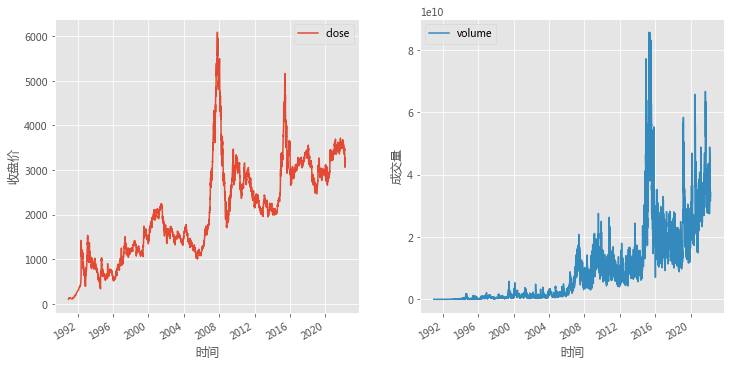

In [120]:
ax1 = appleDf.plot(y=['close', 'volume'], kind='line',
                   figsize=(12, 6), subplots=True, layout=(1, 2))
ax1[0][0].set(xlabel='时间', ylabel='收盘价')
ax1[0][1].set(xlabel='时间', ylabel='成交量')

### 探索时间序列 Cont'd

#### 如何平滑价格数据？

In [175]:
for each in appleDf['close'].rolling(window=3):
    print(each)

date
1990-12-19    99.98
Name: close, dtype: float64
date
1990-12-19     99.98
1990-12-20    104.39
Name: close, dtype: float64
date
1990-12-19     99.98
1990-12-20    104.39
1990-12-21    109.13
Name: close, dtype: float64
date
1990-12-20    104.39
1990-12-21    109.13
1990-12-24    114.55
Name: close, dtype: float64
date
1990-12-21    109.13
1990-12-24    114.55
1990-12-25    120.25
Name: close, dtype: float64
date
1990-12-24    114.55
1990-12-25    120.25
1990-12-26    125.27
Name: close, dtype: float64
date
1990-12-25    120.25
1990-12-26    125.27
1990-12-27    125.28
Name: close, dtype: float64
date
1990-12-26    125.27
1990-12-27    125.28
1990-12-28    126.45
Name: close, dtype: float64
date
1990-12-27    125.28
1990-12-28    126.45
1990-12-31    127.61
Name: close, dtype: float64
date
1990-12-28    126.45
1990-12-31    127.61
1991-01-02    128.84
Name: close, dtype: float64
date
1990-12-31    127.61
1991-01-02    128.84
1991-01-03    130.14
Name: close, dtype: float64
date
199

In [223]:
appleDf['smoothClose'] = appleDf['close'].rolling(window=300).mean()   # 简单移动平均
appleDf['smoothCloseFast'] = appleDf['close'].rolling(window=100).mean()
appleDf

,open,high,low,close,volume,smoothClose,diff,smoothCloseFast
date,,,,,,,,
1990-12-19,96.050,99.980,95.790,99.980,126000,NaN,NaN,NaN
1990-12-20,104.300,104.390,99.980,104.390,19700,NaN,4.410,NaN
1990-12-21,109.070,109.130,103.730,109.130,2800,NaN,4.740,NaN
1990-12-24,113.570,114.550,109.130,114.550,3200,NaN,5.420,NaN
1990-12-25,120.090,120.250,114.550,120.250,1500,NaN,5.700,NaN
...,...,...,...,...,...,...,...,...
2022-03-23,3264.792,3279.887,3251.982,3271.033,34987537000,3519.571180,11.171,3505.73722
2022-03-24,3256.057,3266.887,3236.659,3250.264,32900665400,3519.083517,-20.769,3502.61681
2022-03-25,3247.157,3257.106,3211.645,3212.240,34002000600,3518.466700,-38.024,3499.55504


<AxesSubplot:xlabel='date'>

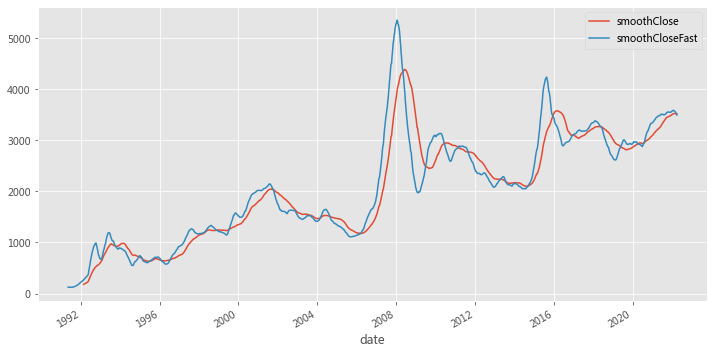

In [225]:
appleDf.plot(kind='line', y=['smoothClose','smoothCloseFast'], figsize=(12, 6))

<AxesSubplot:xlabel='date'>

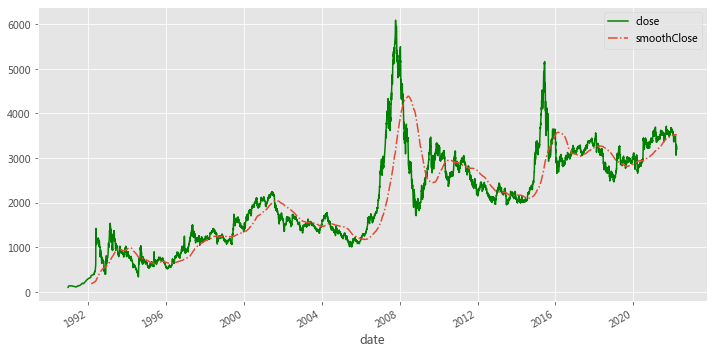

In [232]:
appleDf.plot(kind='line', y=['close', 'smoothClose'],
             figsize=(12, 6), style=['-g', '-.'])

- `style`：字符串表示
$$
\text{linestyle marker color}
$$

- 可选样式

In [196]:
IFrame('https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html',
       width=800, height=600)

#### 可以预测股价吗？

<center><img src="./img/analysis/数学的深渊.jpg"></center>

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

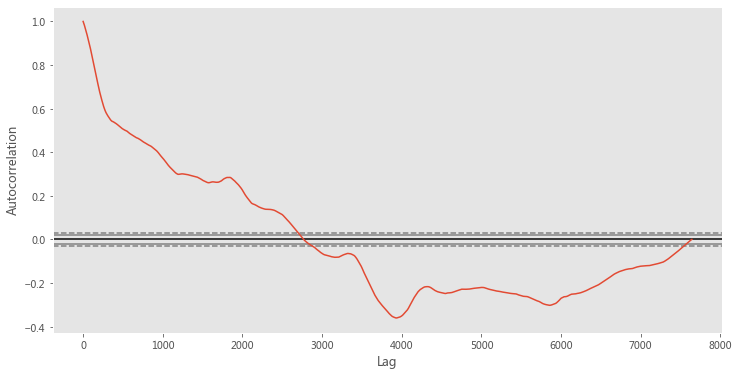

In [152]:
fig, ax = plt.subplots(figsize=(12, 6))
pd.plotting.autocorrelation_plot(appleDf['close'], ax=ax)

- 上图中横实线：95%置信区间上下界
- 上图中横虚线：99%置信区间上下界

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

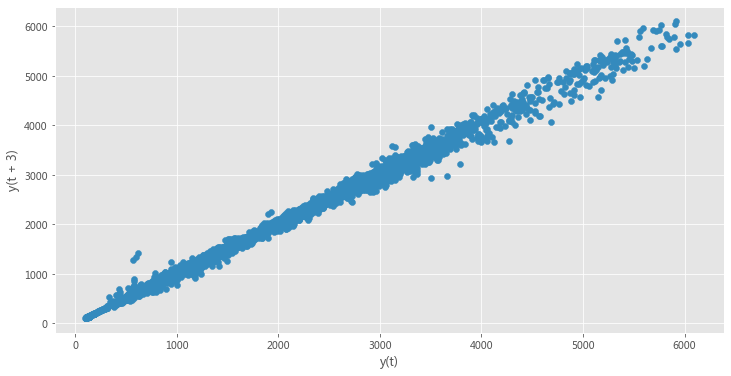

In [231]:
fig1, ax1 = plt.subplots(figsize=(12, 6))
pd.plotting.lag_plot(appleDf['close'], lag=3, ax=ax1)

#### 时间序列的差分

In [233]:
appleDf['diff'] = appleDf['close'].diff(periods=1)
appleDf

,open,high,low,close,volume,smoothClose,diff,smoothCloseFast
date,,,,,,,,
1990-12-19,96.050,99.980,95.790,99.980,126000,NaN,NaN,NaN
1990-12-20,104.300,104.390,99.980,104.390,19700,NaN,4.410,NaN
1990-12-21,109.070,109.130,103.730,109.130,2800,NaN,4.740,NaN
1990-12-24,113.570,114.550,109.130,114.550,3200,NaN,5.420,NaN
1990-12-25,120.090,120.250,114.550,120.250,1500,NaN,5.700,NaN
...,...,...,...,...,...,...,...,...
2022-03-23,3264.792,3279.887,3251.982,3271.033,34987537000,3519.571180,11.171,3505.73722
2022-03-24,3256.057,3266.887,3236.659,3250.264,32900665400,3519.083517,-20.769,3502.61681
2022-03-25,3247.157,3257.106,3211.645,3212.240,34002000600,3518.466700,-38.024,3499.55504


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

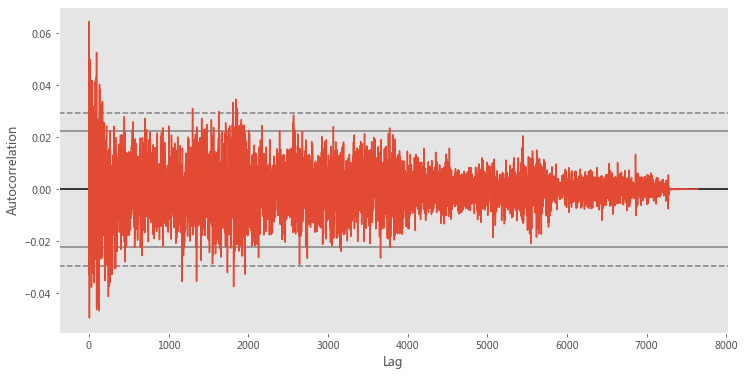

In [156]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
pd.plotting.autocorrelation_plot(appleDf.iloc[1:, -2], ax=ax2)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

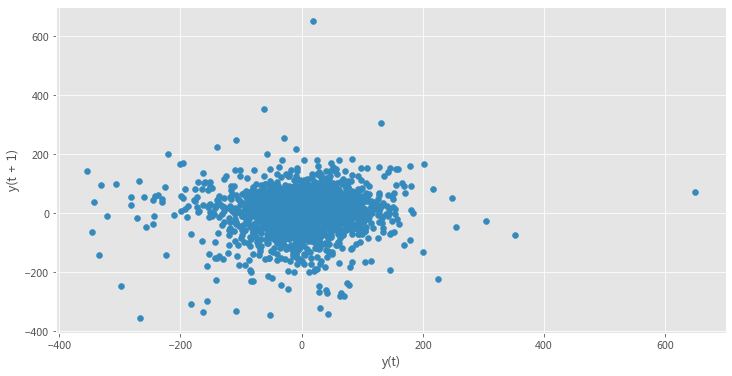

In [157]:
fig3, ax3 = plt.subplots(figsize=(12, 6))
pd.plotting.lag_plot(appleDf.iloc[1:, -2], lag=1, ax=ax3)

### 探索时间序列数据 Cont'd

In [28]:
agDf = pd.read_csv('./data/analysis/agMinHist.csv',
                   index_col=0, parse_dates=True)
agDf

,open,high,low,close,volume,hold
datetime,,,,,,
2020-03-26 11:29:00,3500.0,3502.0,3500.0,3502.0,1,18103
2020-03-26 13:31:00,3502.0,3514.0,3496.0,3496.0,1,18102
2020-03-26 13:33:00,3496.0,3511.0,3496.0,3507.0,3,18102
2020-03-26 13:35:00,3504.0,3504.0,3504.0,3504.0,2,18100
2020-03-26 13:37:00,3504.0,3509.0,3504.0,3509.0,2,18100
...,...,...,...,...,...,...
2021-12-15 14:06:00,4593.0,4600.0,4593.0,4600.0,10,25212
2021-12-15 14:29:00,4600.0,4600.0,4593.0,4593.0,20,25212
2021-12-15 14:34:00,4595.0,4595.0,4595.0,4595.0,6,25206


#### 判断是否有重复时间

```python
DataFrame.index.duplicated(keep='first')
```
- 返回`Bool`列表
- `keep`：保留哪个重复的值，可选`first`、`last`、False（所有重复值都标记）

In [29]:
agDf.loc[agDf.index.duplicated()]

,open,high,low,close,volume,hold
datetime,,,,,,
2020-04-07 09:01:00,3780.0,3789.0,3752.0,3752.0,23,831
2020-04-07 09:03:00,3763.0,3763.0,3746.0,3746.0,13,834
2020-04-07 09:04:00,3746.0,3746.0,3739.0,3739.0,6,835
2020-04-07 09:07:00,3718.0,3722.0,3710.0,3710.0,10,838
2020-04-07 09:15:00,3715.0,3717.0,3714.0,3714.0,22,859
...,...,...,...,...,...,...
2020-04-15 09:01:00,3814.0,3814.0,3814.0,3814.0,2,492
2020-04-15 10:32:00,3792.0,3792.0,3782.0,3782.0,2,492
2020-04-15 10:38:00,3796.0,3796.0,3790.0,3790.0,2,491


#### 过滤重复时间

In [30]:
agDf.loc[~agDf.index.duplicated(keep='last')]

,open,high,low,close,volume,hold
datetime,,,,,,
2020-03-26 11:29:00,3500.0,3502.0,3500.0,3502.0,1,18103
2020-03-26 13:31:00,3502.0,3514.0,3496.0,3496.0,1,18102
2020-03-26 13:33:00,3496.0,3511.0,3496.0,3507.0,3,18102
2020-03-26 13:35:00,3504.0,3504.0,3504.0,3504.0,2,18100
2020-03-26 13:37:00,3504.0,3509.0,3504.0,3509.0,2,18100
...,...,...,...,...,...,...
2021-12-15 14:06:00,4593.0,4600.0,4593.0,4600.0,10,25212
2021-12-15 14:29:00,4600.0,4600.0,4593.0,4593.0,20,25212
2021-12-15 14:34:00,4595.0,4595.0,4595.0,4595.0,6,25206


#### 判断价格是否有异常

- `high`价格是否比其他价格低
- `low`价格是否比其他价格高

In [31]:
agDf.loc[(agDf['high'] < agDf['open']) | (agDf['high'] < agDf['close']) | (
    agDf['high'] < agDf['low']) | (agDf['low'] > agDf['open']) | (agDf['low'] > agDf['close'])]

,open,high,low,close,volume,hold
datetime,,,,,,
2020-12-11 22:31:00,5005.0,4977.0,4965.0,4966.0,124,55098


### 交互式绘图

#### 交互式绘图工具

- `plotly`：交互式的开源绘图图库, ['https://plotly.com/python/']('https://plotly.com/python/')

- `bokeh`：`python`专用的交互式绘图工具

In [89]:
IFrame('https://docs.bokeh.org/en/latest/', width=800, height=600)

#### 安装与使用

- 安装
```python
pip install pandas-bokeh
conda install -c patrikhlobil pandas-bokeh
```

- `pandas`使用`bokeh`绘图方法

```python
import pandas_bokeh
pandas_bokeh.output_notebook()   # 在jupyter notebook中显示图形
pandas_bokeh.output_file('Plot.html') #保存成本地网页
df.plot_bokeh(kind)
```

- 支持绘制的图形：`line`,`point`,`step`,`scatter`,`bar`,`hist`,`area`,`pie`,`map`

- 主页：[https://patrikhlobil.github.io/Pandas-Bokeh/#index--page-root](https://patrikhlobil.github.io/Pandas-Bokeh/#index--page-root)

#### 绘制图形

- 绘制柱状图

In [235]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [160]:
classSe.plot_bokeh(kind='bar')

Figure(id='1182', ...)

- 绘制折线图

In [255]:
appleDf.plot_bokeh(kind='line',y='close',figsize=(800,600),rangetool=True)

Column(id='11264', ...)

In [343]:
hoverStr = """<p>Open @open{0.00} </p>
<p>High @high{0.00} </p>
<p>Low @low{0.00} </p>
<p>Close @close{0.00} </P>
"""
appleDf.plot_bokeh(kind='line',y='close',figsize=(1000,600),hovertool_string=hoverStr)

Figure(id='141109', ...)

- 绘制散点图

In [161]:
titanicDf.plot_bokeh(x='Age', y='Fare', kind='scatter')

Figure(id='1297', ...)

- 绘制直方图

In [162]:
titanicDf['Fare'].plot_bokeh(kind='hist')

Figure(id='1429', ...)

- 子图绘制
    - **不支持** `subplots=True`
    - 使用`pandas_bokeh.plot_grid()`

In [163]:
fareFig = titanicDf['Fare'].plot_bokeh(kind='hist', show_figure=False)
ageFig = titanicDf['Age'].plot_bokeh(
    kind='hist', color='red', show_figure=False)
pandas_bokeh.plot_grid([[fareFig], [ageFig]], plot_width=450)

/home/VENV36/lib/python3.6/site-packages/pandas_bokeh/plot.py:768: Warning: There are NaN values in column 'Age'. For the histogram, these rows have been neglected.
  Warning,


Column(id='1700', ...)

In [164]:
pandas_bokeh.plot_grid([[fareFig, ageFig]], plot_width=450)

Column(id='1869', ...)

- 绘制面积图

In [204]:
energyDf = pd.read_csv('./data/analysis/energy.csv', index_col=0)
energyDf.head()

,Oil,Gas,Coal,Nuclear Energy,Hydroelectricity,Other Renewable
Year,,,,,,
1970,2291.5,826.7,1467.3,17.7,265.8,5.8
1971,2427.7,884.8,1459.2,24.9,276.4,6.3
1972,2613.9,933.7,1475.7,34.1,288.9,6.8
1973,2818.1,978.0,1519.6,45.9,292.5,7.3
1974,2777.3,1001.9,1520.9,59.6,321.1,7.7


In [242]:
energyDf.plot_bokeh(kind='area', figsize=(1000, 400),
                    legend='top_left', stacked=True)

Figure(id='5739', ...)

- 绘制饼图

In [206]:
energyDf.iloc[energyDf.shape[0]-1].plot_bokeh(kind='pie', figsize=(800, 600))

__x__values_original


Figure(id='4679', ...)

- 比较不同年份能源结构：嵌套的饼图

In [207]:
energyDf.T

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Oil,2291.5,2427.7,2613.9,2818.1,2777.3,2749.2,2929.1,3028.8,3125.9,3177.4,...,4148.8,4077.6,4208.9,4252.4,4304.9,4359.3,4394.7,4475.8,4557.3,4621.9
Gas,826.7,884.8,933.7,978.0,1001.9,1002.4,1062.0,1096.9,1142.9,1214.3,...,2607.2,2534.6,2730.8,2786.8,2860.8,2899.0,2922.3,2987.3,3073.2,3156.0
Coal,1467.3,1459.2,1475.7,1519.6,1520.9,1550.4,1606.9,1654.5,1673.0,1750.6,...,3500.6,3447.0,3605.6,3778.9,3794.5,3865.3,3862.2,3765.0,3706.0,3731.5
Nuclear Energy,17.7,24.9,34.1,45.9,59.6,82.4,98.1,121.2,140.1,144.7,...,619.5,610.8,626.2,600.0,559.5,563.8,575.0,582.8,591.2,596.4
Hydroelectricity,265.8,276.4,288.9,292.5,321.1,325.9,324.8,333.2,359.5,377.3,...,738.5,736.2,777.5,792.7,830.7,859.4,879.7,880.5,913.3,918.6
Other Renewable,5.8,6.3,6.8,7.3,7.7,7.8,8.7,9.2,9.7,10.4,...,123.9,143.7,170.5,203.5,238.7,282.6,320.1,368.8,417.4,486.8


In [208]:
energyDf.T[[1970, 1980, 1990, 2000, 2010, 2017]].plot_bokeh(kind='pie')

__x__values_original


Figure(id='5010', ...)

## 数据业务模型

### RFM模型
<center><img src="./img/analysis/rfm.jfif" width=60%></center>

#### 读取数据

- 某个互联网电商一年内的销售数据

In [354]:
rfmDf = pd.read_csv('./data/analysis/rfm_sale.csv')
rfmDf.head()

,Unnamed: 0,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,0,142074,2018-01-01,4196439032,9399.0
1,1,56927,2018-01-01,4198324983,8799.0
2,2,87058,2018-01-01,4191287379,6899.0
3,3,136104,2018-01-01,4198508313,5999.0
4,4,117831,2018-01-01,4202238313,5399.0


In [136]:
rfmDf.dtypes

Unnamed: 0      int64
USERID          int64
ORDERDATE      object
ORDERID         int64
AMOUNTINFO    float64
dtype: object

- 删除无用列

In [355]:
del rfmDf['Unnamed: 0']

#### 重复数据判断与清理

In [140]:
rfmDf.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
76045    False
76046    False
76047    False
76048    False
76049    False
Length: 76050, dtype: bool

In [141]:
rfmDf.duplicated().value_counts()

False    76050
dtype: int64

- 没有重复记录

#### 缺失数据判断与清理

In [142]:
rfmNa = rfmDf.isna()
rfmNa

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76045,False,False,False,False
76046,False,False,False,False
76047,False,False,False,False
76048,False,False,False,False


##### 显示含有缺失值的行

In [149]:
rfmNa.any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
76045    False
76046    False
76047    False
76048    False
76049    False
Length: 76050, dtype: bool

- `DataFrame.any(axis=0)`：沿着纵向（`axis=0`)或横向（`axis=1`）的方向是否有元素是`True`

In [81]:
df = pd.DataFrame({"A": [1, 2], "B": [0, 2], "C": [0, 0]})
df
df.any()
df.any(axis=1)

,A,B,C
0,1,0,0
1,2,2,0


A     True
B     True
C    False
dtype: bool

0    True
1    True
dtype: bool

In [150]:
rfmDf.loc[rfmNa.values.any(axis=1)]

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
20,75849,2018-01-01,4197103430,NaN
72,103714,NaN,4136159682,189.0
114,155209,2018-01-01,4177940815,NaN
229,139877,NaN,4111956196,6.3
233,54599,2018-01-01,4119525205,NaN
260,65456,2018-01-02,4195643356,NaN
56387,122134,2018-09-21,3826649773,NaN
63260,116995,2018-10-24,3981569421,NaN
71201,98888,2018-12-06,3814398698,NaN


##### 删除缺失行

In [356]:
rfmDf.dropna(how='any', axis=0, inplace=True)

In [357]:
rfmDf.shape

(76041, 4)

#### 可视化消费金额

<AxesSubplot:ylabel='Frequency'>

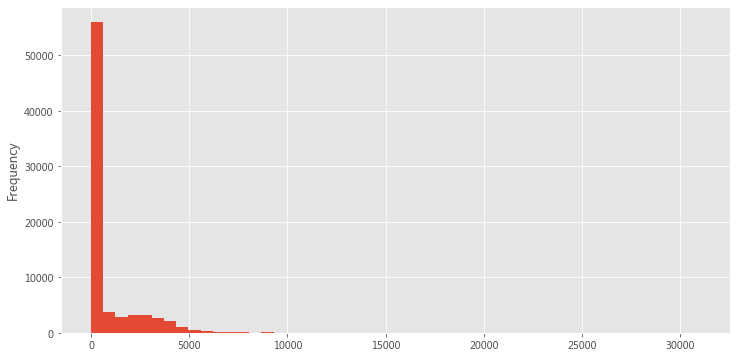

In [351]:
rfmDf['AMOUNTINFO'].plot(kind='hist', bins=50, figsize=(12, 6))

- 消费金额的基本信息

In [160]:
rfmDf['AMOUNTINFO'].describe()

count    76041.000000
mean       777.301443
std       1448.300325
min          0.500000
25%         12.500000
50%         65.000000
75%        790.000000
max      30999.000000
Name: AMOUNTINFO, dtype: float64

- 没有金额小于0，不需要进行异常处理

#### 将`ORDERDATE`转变为日期型数据

In [358]:
rfmDf['ORDERDATE'] = pd.to_datetime(rfmDf['ORDERDATE'])

In [359]:
rfmDf.dtypes

USERID                 int64
ORDERDATE     datetime64[ns]
ORDERID                int64
AMOUNTINFO           float64
dtype: object

##### 增加一列计算`ORDERDATE`距离今天的间隔

In [360]:
pd.to_datetime('today')-rfmDf['ORDERDATE']

0       1556 days 09:08:21.769592
1       1556 days 09:08:21.769592
2       1556 days 09:08:21.769592
3       1556 days 09:08:21.769592
4       1556 days 09:08:21.769592
                   ...           
76045   1194 days 09:08:21.769592
76046   1194 days 09:08:21.769592
76047   1194 days 09:08:21.769592
76048   1194 days 09:08:21.769592
76049   1194 days 09:08:21.769592
Name: ORDERDATE, Length: 76041, dtype: timedelta64[ns]

In [362]:
# rfmDf['INTERVAL'] = [x.days for x in (
#     pd.to_datetime('today')-rfmDf['ORDERDATE'])]
rfmDf['INTERVAL'] = (pd.to_datetime('today')-rfmDf['ORDERDATE']).dt.days

In [363]:
rfmDf.head()

,USERID,ORDERDATE,ORDERID,AMOUNTINFO,INTERVAL
0,142074,2018-01-01,4196439032,9399.0,1556
1,56927,2018-01-01,4198324983,8799.0,1556
2,87058,2018-01-01,4191287379,6899.0,1556
3,136104,2018-01-01,4198508313,5999.0,1556
4,117831,2018-01-01,4202238313,5399.0,1556


#### 计算R、F、M值

##### 计算最近一次消费

In [364]:
rDf = rfmDf.groupby(by='USERID', sort=False).agg({'INTERVAL': 'min'})
rDf.head()

,INTERVAL
USERID,
142074,1551
56927,1219
87058,1418
136104,1556
117831,1556


##### 计算年消费频次

In [365]:
fDf = rfmDf.groupby(by='USERID', sort=False).agg({'USERID': 'count'})
fDf.head()

,USERID
USERID,
142074,2
56927,2
87058,2
136104,1
117831,1


##### 计算年消费金额

In [366]:
mDf = rfmDf.groupby(by='USERID', sort=False).agg({'AMOUNTINFO': 'sum'})
mDf.head()

,AMOUNTINFO
USERID,
142074,9408.9
56927,8826.9
87058,11898.0
136104,5999.0
117831,5399.0


##### 将上述三个表合并成一个表

In [368]:
totDf = pd.concat([rDf,fDf,mDf],axis=1,join='inner')
totDf.head()

,INTERVAL,USERID,AMOUNTINFO
USERID,,,
142074,1551,2,9408.9
56927,1219,2,8826.9
87058,1418,2,11898.0
136104,1556,1,5999.0
117831,1556,1,5399.0


In [169]:
tmp = rDf.merge(fDf, left_index=True, right_index=True)
tmp.head()

,INTERVAL,USERID
USERID,,
142074,1180,2
56927,848,2
87058,1047,2
136104,1185,1
117831,1185,1


In [170]:
totDf = tmp.merge(mDf, left_index=True, right_index=True)
totDf.head()

,INTERVAL,USERID,AMOUNTINFO
USERID,,,
142074,1180,2,9408.9
56927,848,2,8826.9
87058,1047,2,11898.0
136104,1185,1,5999.0
117831,1185,1,5399.0


##### 更改列名

In [369]:
totDf.columns = ['最近一次消费间隔', '年消费次数', '年消费金额']
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额
USERID,,,
142074,1551,2,9408.9
56927,1219,2,8826.9
87058,1418,2,11898.0
136104,1556,1,5999.0
117831,1556,1,5399.0


##### 对R、F、M打分

- 均使用$1\sim5$打分
- 最近一次消费间隔越大，分值越小
- 年消费次数越大，分值越大
- 年消费金额越大，分值越大
- 将各个维度的分值作为新列接在原数据表上

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

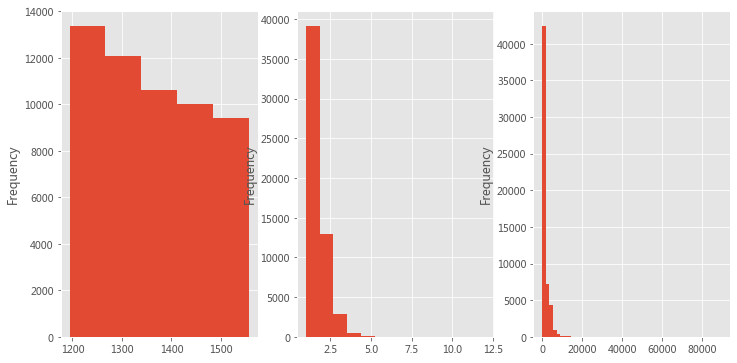

In [399]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
totDf['最近一次消费间隔'].plot(kind='hist', bins=5,ax=ax[0])
totDf['年消费次数'].plot(kind='hist', bins=13, ax=ax[1])
totDf['年消费金额'].plot(kind='hist', bins=50,ax=ax[2])

In [193]:
pd.qcut(totDf['最近一次消费间隔'], q=5)
pd.qcut(totDf['年消费金额'], q=5)

USERID
142074    (1100.0, 1185.0]
56927     (822.999, 881.0]
87058     (1020.0, 1100.0]
136104    (1100.0, 1185.0]
117831    (1100.0, 1185.0]
                ...       
154947    (822.999, 881.0]
66477     (822.999, 881.0]
140056    (822.999, 881.0]
51680     (822.999, 881.0]
109535    (822.999, 881.0]
Name: 最近一次消费间隔, Length: 55540, dtype: category
Categories (5, interval[float64]): [(822.999, 881.0] < (881.0, 948.6] < (948.6, 1020.0] < (1020.0, 1100.0] < (1100.0, 1185.0]]

USERID
142074    (2286.0, 89566.9]
56927     (2286.0, 89566.9]
87058     (2286.0, 89566.9]
136104    (2286.0, 89566.9]
117831    (2286.0, 89566.9]
                ...        
154947        (0.499, 14.9]
66477         (0.499, 14.9]
140056        (0.499, 14.9]
51680         (0.499, 14.9]
109535        (0.499, 14.9]
Name: 年消费金额, Length: 55540, dtype: category
Categories (5, interval[float64]): [(0.499, 14.9] < (14.9, 61.9] < (61.9, 299.0] < (299.0, 2286.0] < (2286.0, 89566.9]]

In [194]:
totDf['年消费次数'].value_counts()

1     39130
2     12957
3      2887
4       506
5        54
6         5
12        1
Name: 年消费次数, dtype: int64

- 消费次数不同数值过少，不适宜用分位数分类，手动设定分类区间

In [195]:
pd.cut(totDf['年消费次数'], bins=[0, 1, 2, 3, 5, 12])

USERID
142074    (1, 2]
56927     (1, 2]
87058     (1, 2]
136104    (0, 1]
117831    (0, 1]
           ...  
154947    (0, 1]
66477     (0, 1]
140056    (0, 1]
51680     (0, 1]
109535    (0, 1]
Name: 年消费次数, Length: 55540, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 5] < (5, 12]]

In [196]:
totDf['R'] = pd.qcut(totDf['最近一次消费间隔'], q=5, labels=range(5, 0, -1))
totDf['F'] = pd.cut(totDf['年消费次数'], bins=[0, 1, 2, 3, 5, 12], labels=range(1, 6, 1))
totDf['M'] = pd.qcut(totDf['年消费金额'], q=5, labels=range(1, 6, 1))
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额,R,F,M
USERID,,,,,,
142074,1180,2,9408.9,1,2,5
56927,848,2,8826.9,5,2,5
87058,1047,2,11898.0,2,2,5
136104,1185,1,5999.0,1,1,5
117831,1185,1,5399.0,1,1,5


#### 计算RFM总值

##### 新建立一列记录RFM总值
$$
RFM = 100\times R + 10\times F + 1\times M
$$

In [197]:
totDf['RFM'] = 100*np.array(totDf['R'])+10 * \
    np.array(totDf['F'])+np.array(totDf['M'])
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额,R,F,M,RFM
USERID,,,,,,,
142074,1180,2,9408.9,1,2,5,125
56927,848,2,8826.9,5,2,5,525
87058,1047,2,11898.0,2,2,5,225
136104,1185,1,5999.0,1,1,5,115
117831,1185,1,5399.0,1,1,5,115


- 由于`Series`不能直接运行算术运算，所以先把每一列变成`Numpy`的数组`array`，方法是`np.array(Series)`

##### 分类客户

In [198]:
cLabels = ['流失客户', '一般维持客户', '新客户', '潜力客户',
           '重要挽留客户', '重要深耕客户', '重要唤回客户', '重要价值客户']
pd.cut(totDf['RFM'], bins=8, labels=cLabels)

USERID
142074      流失客户
56927     重要价值客户
87058        新客户
136104      流失客户
117831      流失客户
           ...  
154947    重要价值客户
66477     重要价值客户
140056    重要价值客户
51680     重要价值客户
109535    重要价值客户
Name: RFM, Length: 55540, dtype: category
Categories (8, object): [流失客户 < 一般维持客户 < 新客户 < 潜力客户 < 重要挽留客户 < 重要深耕客户 < 重要唤回客户 < 重要价值客户]

In [199]:
totDf['Label'] = pd.cut(totDf['RFM'], bins=8, labels=cLabels)
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额,R,F,M,RFM,Label
USERID,,,,,,,,
142074,1180,2,9408.9,1,2,5,125,流失客户
56927,848,2,8826.9,5,2,5,525,重要价值客户
87058,1047,2,11898.0,2,2,5,225,新客户
136104,1185,1,5999.0,1,1,5,115,流失客户
117831,1185,1,5399.0,1,1,5,115,流失客户


#### 可视化各类客户比例

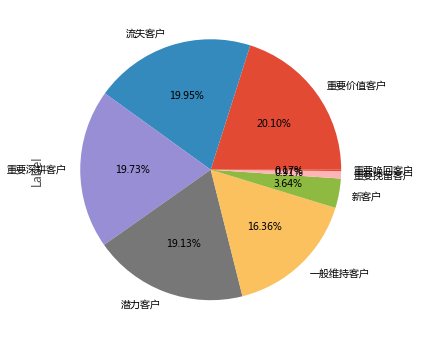

In [200]:
totDf['Label'].value_counts().plot(
    kind='pie', figsize=(12, 6), autopct='%.2f%%')

[Text(0, 0.5, '金额'), Text(0.5, 0, '客户类型')]

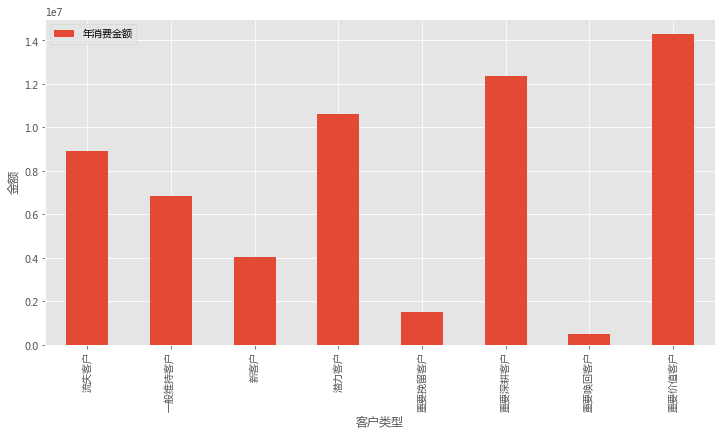

In [201]:
axRFM = totDf.groupby('Label').agg(
    {'年消费金额': 'sum'}).plot(kind='bar', figsize=(12, 6))
axRFM.set(xlabel='客户类型', ylabel='金额')

## 数据统计分析

- `SciPy`是一个进行科学计算的工具箱
- 积分、插值、线性代数、优化、统计等

```python
from scipy import stats
```

### 两组样本均值比较

- 推断两个样本的均值是否一样
- 利用`t`检验

#### 问题

- 泰坦尼克生还和未生还人员在年龄和船票价格上有差异吗？

#### 读入数据

In [16]:
titanicDf = pd.read_csv('./data/analysis/train.csv')
titanicDf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 提出假设

In [6]:
titanicDf.groupby(by='Survived').agg({'Fare': 'mean', 'Age': 'mean'})

,Fare,Age
Survived,,
0,22.117887,30.626179
1,48.395408,28.343690


<dl class="row alert-info">
    <dt class="col-md-2">假设1：</dt>
    <dd class="col-md-10">生还人员和未生还人员购买的船票价格有显著差异。</dd>
</dl>
<dl class="row alert-danger">
    <dt class="col-md-2">假设2：</dt>
    <dd class="col-md-10">生还人员和未生还人员的年龄有显著差异。</dd>
</dl>

#### 数据预处理

##### 是否有重复记录

In [8]:
titanicDup = titanicDf.duplicated()
titanicDup.value_counts()

False    891
dtype: int64

- 该数据集没有重复记录

##### 是否有缺失值

In [9]:
titanicNa = titanicDf.isna()
titanicNa
titanicNa.sum(axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 填补缺失值

In [42]:
titanicDf['Age'].fillna(titanicDf['Age'].mean(), inplace=True)

#### 检验假设

##### 生成生还人员的船票价格序列和未生还人员的船票价格序列

In [12]:
fareSurv = titanicDf.loc[titanicDf['Survived'] == 1, 'Fare']
fareUnsurv = titanicDf.loc[titanicDf['Survived'] == 0, 'Fare']

##### 两列的方差是否一样
```python
stats.levene(sample1,sample2)
```
- 检验两个样本的方差是否一样。原假设：两个样本的方差一样
- 返回两个值，分别是检验统计量和$p$值

In [13]:
lstatsFare, lpvFare = stats.levene(fareSurv, fareUnsurv)
print(f'方差相等检验的统计量是{lstatsFare},p值是{lpvFare}')
print(f'方差相等检验的统计量是{lstatsFare:.3f},p值是{lpvFare:.3f}')

方差相等检验的统计量是45.09964096576531,p值是3.337352710626e-11
方差相等检验的统计量是45.100,p值是0.000


- 结论：`fareSurv`和`fareUnsurv`序列的方差**不相等**，假设不成立。

##### 两列的均值是否相等

```python
stats.ttest_ind(sample1,sample2,equal_var=True)
```
- $t$检验，检验两个样本序列的均值是否相等。原假设：两个样本序列的均值相等
- `equal_var`：两个样本序列的方差是否一样，默认一样
- 返回两个值，分别是$t$统计量和$p$值

In [14]:
tstatsFare, tpvFare = stats.ttest_ind(fareSurv, fareUnsurv, equal_var=False)
print(f't检验的统计量是{tstatsFare:.3f}，p值是{tpvFare:.3f}')

t检验的统计量是6.839，p值是0.000


- 结论：`fareSurv`和`fareUnsurv`序列的均值**不相等**。

##### 生成生还人员的年龄序列和未生还人员的年龄序列

In [400]:
ageSurv = titanicDf.loc[titanicDf['Survived'] == 1, 'Age']
ageUnsurv = titanicDf.loc[titanicDf['Survived'] == 0, 'Age']

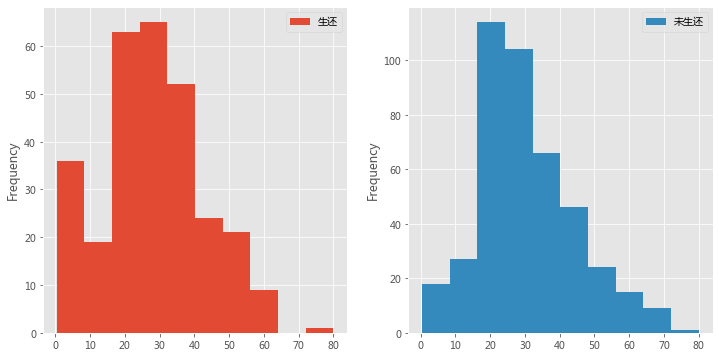

In [410]:
_=pd.DataFrame({'生还':ageSurv,'未生还':ageUnsurv}).plot(kind='hist',figsize=(12,6),subplots=True,layout=(1,2))

##### 检验两个序列方差是否一样

In [16]:
lstatsAge, lpvAge = stats.levene(ageSurv, ageUnsurv)
print(f'方差相等检验的统计量是{lstatsAge:.3f},p值是{lpvAge:.3f}')

方差相等检验的统计量是5.481,p值是0.019


- 结论：`ageSurv`和`ageUnsurv`序列的方差**不相等**。

##### 两列均值是否相等

In [17]:
tstatsAge, tpvAge = stats.ttest_ind(ageSurv, ageUnsurv, equal_var=False)
print(f't检验的统计量是{tstatsAge:.3f}，p值是{tpvAge:.3f}')

t检验的统计量是-2.039，p值是0.042


- 结论：ageSurv和ageUnsurv序列的均值**不相等**，假设2成立。

### 多组样本均值比较

- 推断**多个**样本的均值是否相等
- 方差分析（ANOVA，**AN**alysis **O**f **Va**riance）

- 相对于两两`t`检验的优势：减少类型I错误（拒真错误）
    + 类型I错误：原假设是正确的，但是却拒绝了原假设

#### 多重比较谬误（family-wise error rate）

- 给定单次比较的置信水平$\alpha$，共需比较$n$次，多重比较谬误为（fwer，至少出现一次类型I错误的概率）

$$fwer=1-(1-\alpha)^n$$

In [31]:
compDf = pd.DataFrame({'组数':range(3,11)})
compDf

,组数
0,3
1,4
2,5
3,6
4,7
5,8
6,9
7,10


In [33]:
compDf['比较次数'] = compDf['组数'].map(lambda x: x*(x-1)//2)
compDf

,组数,比较次数
0,3,3
1,4,6
2,5,10
3,6,15
4,7,21
5,8,28
6,9,36
7,10,45


In [35]:
compDf['多重比较谬误'] = compDf['比较次数'].map(lambda x: 1-(1-0.05)**x)
compDf

,组数,比较次数,多重比较谬误
0,3,3,0.142625
1,4,6,0.264908
2,5,10,0.401263
3,6,15,0.536709
4,7,21,0.659438
5,8,28,0.762173
6,9,36,0.842221
7,10,45,0.900560


#### 问题

- 购买不同船票等级的乘客年龄是否存在差异？

In [18]:
titanicDf['Pclass'].unique()

array([3, 1, 2])

<AxesSubplot:xlabel='Pclass'>

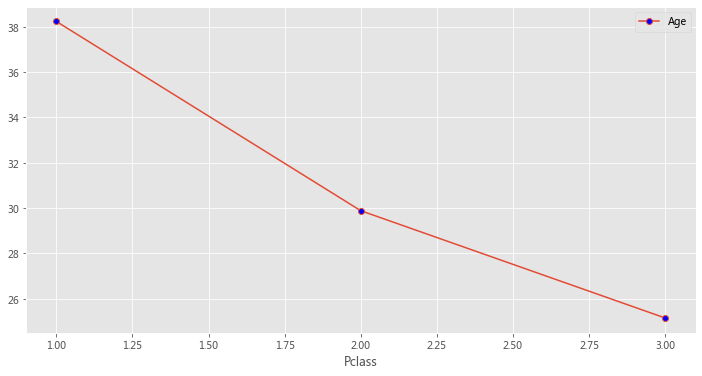

In [18]:
titanicDf.groupby('Pclass').agg({'Age': 'mean'}).plot(
    kind='line', figsize=(12, 6), marker='o', markerfacecolor='blue')

#### 提出假设

<dl class="row alert-info">
    <dt class="col-md-2">假设3：</dt>
    <dd class="col-md-10">购买不同船票等级的的乘客年龄均值不相等。</dd>
</dl>

#### 假设检验

```python
    stats.f_oneway(args)
```
- 执行单因素方差分析
- `args`:需比较的多个样本
- 返回两个值，分别是$F$统计量和$p$值

In [20]:
fstats, fpv = stats.f_oneway(titanicDf.loc[titanicDf['Pclass'] == 1, 'Age'],
                             titanicDf.loc[titanicDf['Pclass'] == 2, 'Age'], titanicDf.loc[titanicDf['Pclass'] == 3, 'Age'])
print(f'F检验的统计量是{fstats:.3f}，p值是{fpv:.3f}')

F检验的统计量是56.574，p值是0.000


- 结论:购买三个船票等级的乘客年龄均值存在**显著差异**.

#### 事后分析（post-hoc analysis）

- 也被称为多组比较
- 检验哪些配对之间有显著差异

##### Tukey方法

- 计算各组均值差的置信区间
- 找到最大均值与最小均值差，如果该差小于某临界值，则其他各组均值差也会小于该临界值，则各组均值差的置信区间会跨越0，即差异不显著

##### 需要用到`StatsModels`包

- [https://www.statsmodels.org/stable/index.html](https://www.statsmodels.org/stable/index.html)

- 安装：
```python
    pip install statsmodels
    conda install -c anaconda statsmodels
```

In [47]:
ageClassDf = titanicDf[['Pclass','Age']].copy()
ageClassDf

,Pclass,Age
0,3,22.000000
1,1,38.000000
2,3,26.000000
3,1,35.000000
4,3,35.000000
...,...,...
886,2,27.000000
887,1,19.000000
888,3,29.699118
889,1,26.000000


```python
from statsmodels.stats.multicomp import pairwise_tukeyhsd
```

In [66]:
tukeyAge = pairwise_tukeyhsd(endog=ageClassDf['Age'],groups=ageClassDf['Pclass'],alpha=0.05)
tukeyAge.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-7.1812,0.001,-10.0685,-4.2939,True
1,3,-10.6449,0.001,-12.9947,-8.295,True
2,3,-3.4637,0.0032,-5.9514,-0.976,True


##### 可视化展示多重比较

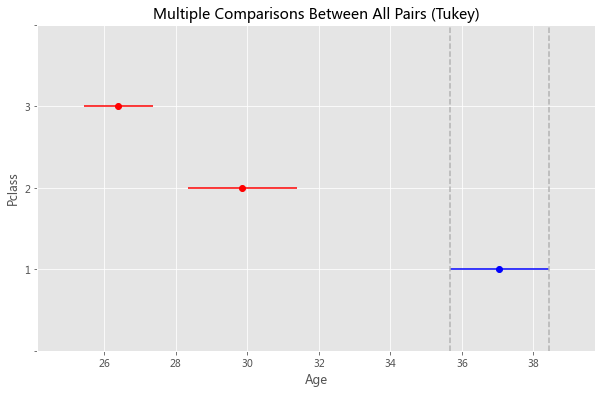

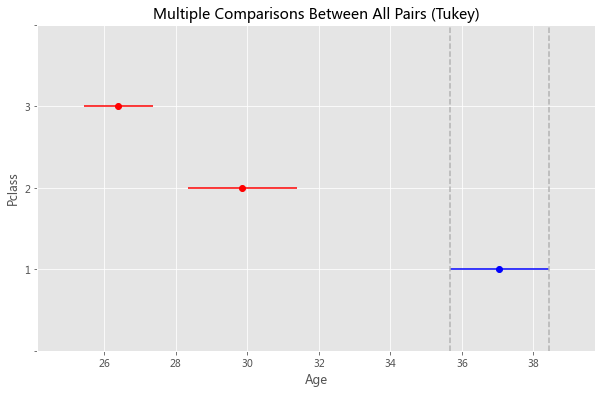

In [69]:
tukeyAge.plot_simultaneous(comparison_name=1,xlabel='Age',ylabel='Pclass')

# comparison_name 作为对比的组，与对比组显著不同的组用红色标出，与对比组没有显著差异的用灰色标出

### 连续变量的相关性检验

#### 问题

- 乘客的年龄和购买的船票价格之间是否有关系?

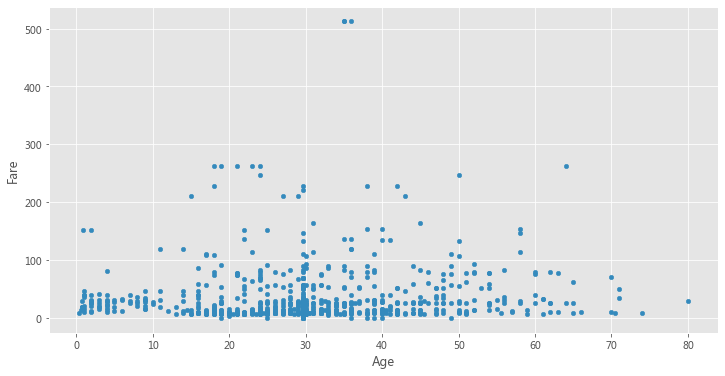

In [21]:
titanicDf.plot(x='Age', y='Fare', kind='scatter', figsize=(12, 6))

#### 相关性检验

```python
    stats.pearsonr(x, y)
```
- 计算两个样本之间的相关系数
- `x`和`y`:输入的样本
- 返回相关系数和$p$值

In [22]:
r, pv = stats.pearsonr(titanicDf['Age'], titanicDf['Fare'])
print(f'乘客年龄和购买船票价格之间的相关系数是{r:.3f},p值是{pv:.3f}')

乘客年龄和购买船票价格之间的相关系数是0.092,p值是0.006


### 分类变量的相关性检验

- $\chi^2$卡方检验用来检验两个分类变量之间是否存在显著的相关性
- 原假设:两个分类变量之间**不存在**显著相关性.

#### 问题

- 乘客购买的船票等级和生存与否是否有关联?
- 在哪个港口登船与生存是否有关联?

#### 提出假设

<dl class="row alert-info">
    <dt class="col-md-2">假设4：</dt>
    <dd class="col-md-10">乘客购买的船票等级与生存与否<strong>不存在</strong>显著的相关性。</dd>
</dl>
<dl class="row alert-danger">
    <dt class="col-md-2">假设5：</dt>
    <dd class="col-md-10">乘客登船的港口与生存与否<strong>不存在</strong>显著的相关性。</dd>
</dl>

#### 假设检验

```python
    stats.chi2_contingency(observed)
```
- `observed`:`contingency table`列联表,也被称作`crosstab`
- 返回$\chi^2$值,$p$值,自由度和期望的频率分布

- 列联表

''|dog|cat|总计
---|---|---|---
male|42|10|52
female|9|39|48
总计|51|49|100

```python
    pd.crosstab(index, columns, margins=False, dropna=True)
```
- `index`:位于行的分类变量
- `columns`:位于列的分类变量
- `margins`:是否显示总计列或行

In [23]:
crtbClass = pd.crosstab(titanicDf['Survived'],
                        titanicDf['Pclass'], margins=True)
crtbClass

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [24]:
chiClass, pvClass, _, _ = stats.chi2_contingency(crtbClass)
print(f'卡方值为{chiClass:.3f},p值为{pvClass:.3f}')

卡方值为102.889,p值为0.000


- 结论:假设4得到验证,购买的船票等级与生存与否之间存在显著相关性.

In [25]:
crtbPort = pd.crosstab(titanicDf['Survived'],
                       titanicDf['Embarked'], margins=True)
crtbPort

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [26]:
chiPort, pvPort, _, _ = stats.chi2_contingency(crtbPort)
print(f'卡方值为{chiPort:.3f},p值为{pvPort:.3f}')

卡方值为26.489,p值为0.000


- 结论:假设5得到验证,登船港口与生存与否之间存在显著相关性.

### 统计绘图

#### 简介

- `seaborn`：`python`的统计绘图软件包
    - 以`matplotlib`为基础
    - 与`pandas`紧密结合

In [39]:
IFrame("https://seaborn.pydata.org/index.html", width=800, height=600)

- 安装
    - `pip install seaborn`
    - `conda install -c anaconda seaborn`

- 使用
    - `import seaborn as sns`
    - `sns.set_theme(context,style)`
        - `context`：paper, notebook, poster，talk
        - `style`：darkgrid, whitegrid, dark, white, ticks

#### 关系图

In [29]:
sns.set_theme(context='notebook', style='whitegrid')

```python
sns.relplot(data,x,y,kind,row,col,hue,style,size)
```
- `data`：`pandas.DataFrame`
- `kind`：绘图类型，`scatter`或者`line`
- `row`,`col`：数据中列的名称，指定子图绘制
- `hue`,`style`,`size`：分组变量，数据中列的名称，指定不同组的颜色、样式、大小

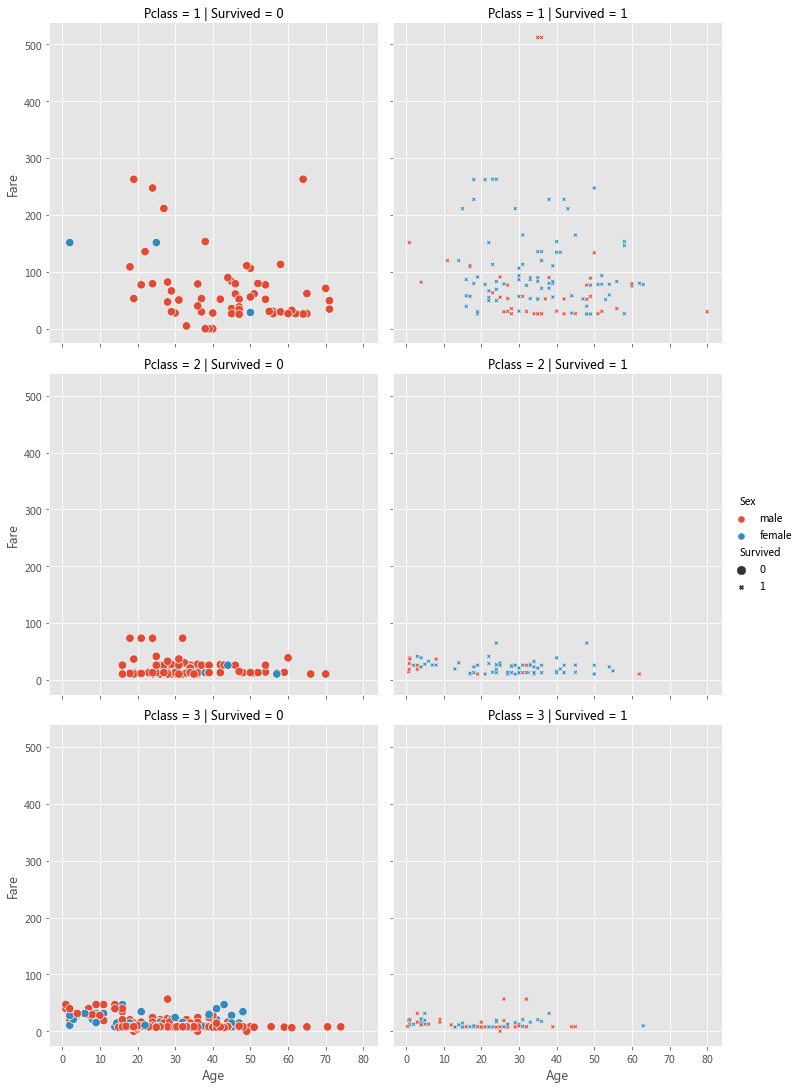

In [5]:
sns.relplot(data=titanicDf, kind='scatter', x='Age', y='Fare', row='Pclass',
            col='Survived', hue='Sex', style='Survived', size='Survived')

#### 分布图

```python
sns.displot(data,x,y,kind,row,col,hue,kde=False)
```
- `kind`：hist,kde,ecdf
- `kde`：是否绘制密度曲线，与`kind='hist'`配合使用

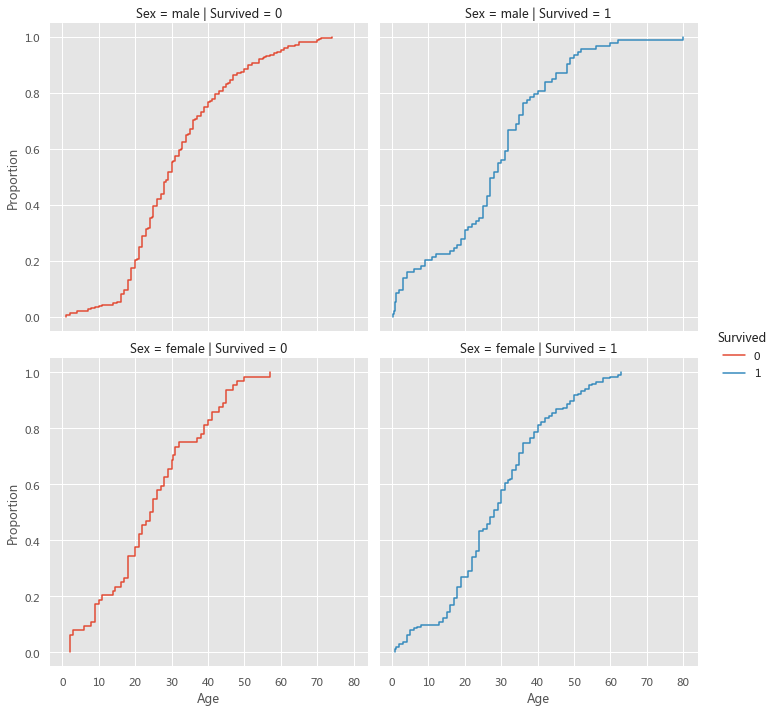

In [64]:
sns.displot(data=titanicDf, x='Age', kind='ecdf',
            row='Sex', col='Survived', hue='Survived')

#### 分类变量图

```python
sns.catplot(data,x,y,kind,row,col,hue)
```

- 用于绘制双变量之间的关系图像

- 可选类型包括：“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”

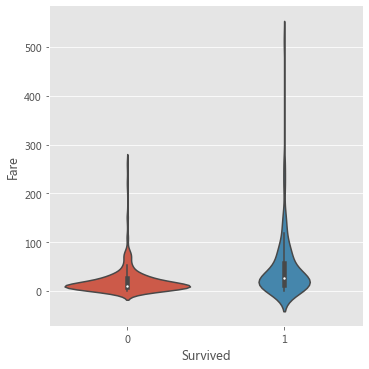

In [25]:
sns.catplot(data=titanicDf, x='Survived', y='Fare', kind='violin')

#### 回归图

```python
sns.lmplot(data,x,y,row,col,hue)
```

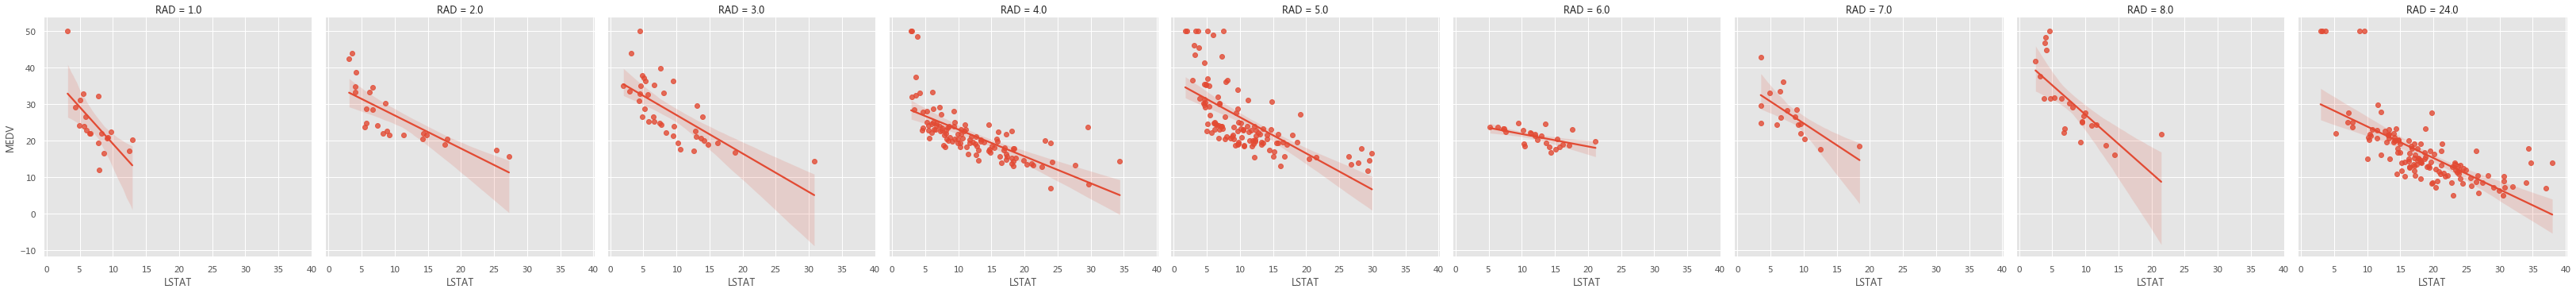

In [67]:
sns.lmplot(data=bostonDf, x='LSTAT', y='MEDV', col='RAD')